In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zgoubidoo
from zgoubidoo.commands import *
_ = zgoubidoo.ureg

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
XPAS = 1 * _.mm
di = zgoubidoo.Input('test-line')
di += Objet2('BUNCH', BORO=2149 * _.kilogauss * _.cm).add([[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]])    
di += Proton()
di += Ymy('INITIAL_YMY')
di += Dipole('DIPOLE_1', RM=200 * _.cm, AT=30 * _.degree, B0=10.745 * _.kilogauss, N=0,
             IL=2,
             ACENT=30 * _.degree / 2,
             IORDRE=25,
             KPOS=2,
             XPAS=0.1 * _.centimeter,
             OMEGA_E=(30 * _.degree / 2),
             OMEGA_S=(-30 * _.degree / 2),
             R1_E=1e9 * _.centimeter,
             U1_E=1e9 * _.centimeter,
             U2_E=1e9 * _.centimeter,
             R2_E=1e9 * _.centimeter,
             RE=200 * _.centimeter,
             TE=0 * _.radian,
             RS=200 * _.centimeter,
             TS=0 * _.radian)
di += Quadrupole('QUAD_1',
                 XL=15 * _.cm,
                 B0=0.0001 * _.tesla,
                 XCE=0.0 * _.centimeter,
                 YCE=0.0 * _.centimeter,
                 ALE=0. * _.degree,
                 XPAS=XPAS,
                 KPOS=2,
                 )
di += Dipole('DIPOLE_2', RM=200 * _.cm, AT=45 * _.degree, B0=10.745 * _.kilogauss, N=0,
             IL=2,
             ACENT=45 * _.degree / 2,
             IORDRE=25,
             KPOS=2,
             XPAS=0.1 * _.centimeter,
             OMEGA_E=(45 * _.degree / 2),
             OMEGA_S=(-45 * _.degree / 2),
             R1_E=1e9 * _.centimeter,
             U1_E=1e9 * _.centimeter,
             U2_E=1e9 * _.centimeter,
             R2_E=1e9 * _.centimeter,
             RE=200 * _.centimeter,
             TE=0 * _.radian,
             RS=200 * _.centimeter,
             TS=0 * _.radian)
di += Ymy('INNER_YMY')
di += Quadrupole('QUAD_1',
                 XL=15 * _.cm,
                 B0=0.1 * _.tesla,
                 XCE=0.0 * _.centimeter,
                 YCE=-0.0 * _.centimeter,
                 ALE=0. * _.degree,
                 XPAS=XPAS,
                 KPOS=2,
                 )
di += ChangeRef(
    TRANSFORMATIONS=[('YS', 50 * _.cm), ('ZR', -15 * _.degree)]
)
di += Dipole('DIPOLE_3', RM=200 * _.cm, AT=30 * _.degree, B0=10.745 * _.kilogauss, N=0,
             IL=2,
             ACENT=30 * _.degree / 2,
             IORDRE=25,
             KPOS=2,
             XPAS=0.1 * _.centimeter,
             OMEGA_E=(30 * _.degree / 2),
             OMEGA_S=(-30 * _.degree / 2),
             R1_E=1e9 * _.centimeter,
             U1_E=1e9 * _.centimeter,
             U2_E=1e9 * _.centimeter,
             R2_E=1e9 * _.centimeter,
             RE=200 * _.centimeter,
             TE=0 * _.radian,
             RS=200 * _.centimeter,
             TS=0 * _.radian)
di += Ymy()
di += Quadrupole('QUAD_2',
                 XL=50 * _.cm,
                 B0=0.00001 * _.tesla,
                 XCE=0.0 * _.centimeter,
                 YCE=0.0 * _.centimeter,
                 ALE=0. * _.degree,
                 XPAS=XPAS,
                 KPOS=2,
                 )
di += Bend('BEND_1',
           WIDTH=60 * _.cm,
           XL=100 * _.cm,
           B1=0.0001 * _.tesla,
           KPOS=1,
           X_E=1 * _.cm,
           LAM_E=5 * _.cm,
           X_S=1 * _.cm,
           LAM_S=5 * _.cm,
           )
di += Decapole('DECA_1',
               XL=50 * _.cm,
               B0=0.0001 * _.gauss,
               R0=20 * _.cm,
               XCE=0.0 * _.centimeter,
               YCE=-0.0 * _.centimeter,
               ALE=0. * _.degree,
               XPAS=XPAS,
               KPOS=1,
               )
di += Dipole('DIPOLE_4', RM=200 * _.cm, AT=30 * _.degree, B0=10.745 * _.kilogauss, N=0,
             IL=2,
             ACENT=30 * _.degree / 2,
             IORDRE=25,
             KPOS=2,
             XPAS=0.1 * _.centimeter,
             OMEGA_E=(30 * _.degree / 2),
             OMEGA_S=(-30 * _.degree / 2),
             R1_E=1e9 * _.centimeter,
             U1_E=1e9 * _.centimeter,
             U2_E=1e9 * _.centimeter,
             R2_E=1e9 * _.centimeter,
             RE=200 * _.centimeter,
             TE=0 * _.radian,
             RS=200 * _.centimeter,
             TS=0 * _.radian
             )
z = zgoubidoo.Zgoubi(path='/Users/chernals/reps/zgoubi-6.0.2/zgoubi')
out = z(di)
print('\n'.join(out['result']))

PermissionError: [Errno 13] Permission denied: 'zgoubi.dat'

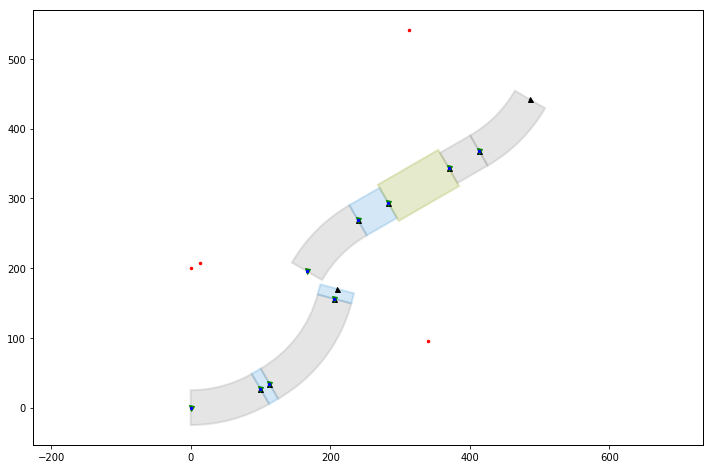

In [ ]:
line = zgoubidoo.survey(beamline=di, reference_frame=Frame())
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

zmpl = zgoubidoo.plotting.ZgoubiMpl(ax, with_frames=True, with_boxes=True, with_centers=True, with_drifts=True, tracks_color='b')
#tracks = zgoubidoo.read_plt_file()
zgoubidoo.plotting.plot(beamline=line, 
                        artist=zmpl, 
                        tracks=None, 
                        )
ax.set_aspect('equal', 'datalim')